In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
df = pd.read_csv('churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [152]:
df.drop(['customerID', 'PhoneService'], axis = 1, inplace=True)

In [153]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


# Mapping


In [155]:
columns = ['gender', 'Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 
           'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
           'PaperlessBilling', 'Churn']

for col in columns:
    df[col] = df[col].apply(lambda val: 1 if val == 'Yes' else 0)

df.head(3)


,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,No,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,0,0,0,0,2,No,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1


In [156]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

# LabelEncoding

In [158]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])

In [159]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Contract'] = le.fit_transform(df['Contract'])

In [160]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,No phone service,DSL,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,0,0,0,0,34,No,DSL,1,0,1,0,0,0,1,0,3,56.95,1889.5,0
2,0,0,0,0,2,No,DSL,1,1,0,0,0,0,0,1,3,53.85,108.15,1


# One Hot Encoding

In [162]:
dummies = pd.get_dummies(df['MultipleLines'], drop_first=True).astype(int)

In [163]:
df_new = pd.concat([df, dummies], axis=1)
df_new.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,No phone service,Yes
0,0,0,1,0,1,No phone service,DSL,0,1,0,...,0,0,0,1,2,29.85,29.85,0,1,0
1,0,0,0,0,34,No,DSL,1,0,1,...,0,0,1,0,3,56.95,1889.5,0,0,0
2,0,0,0,0,2,No,DSL,1,1,0,...,0,0,0,1,3,53.85,108.15,1,0,0


In [164]:
dummies1 = pd.get_dummies(df['InternetService'], drop_first=True).astype(int)

In [165]:
df1 = pd.concat([df_new, dummies1], axis=1)
df1.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,No phone service,Yes,Fiber optic,No
0,0,0,1,0,1,No phone service,DSL,0,1,0,...,0,1,2,29.85,29.85,0,1,0,0,0
1,0,0,0,0,34,No,DSL,1,0,1,...,1,0,3,56.95,1889.5,0,0,0,0,0
2,0,0,0,0,2,No,DSL,1,1,0,...,0,1,3,53.85,108.15,1,0,0,0,0


In [166]:
df_churn = df1.drop(['MultipleLines', 'InternetService'], axis = 1)
df_churn.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,No phone service,Yes,Fiber optic,No
0,0,0,1,0,1,0,1,0,0,0,...,0,1,2,29.85,29.85,0,1,0,0,0
1,0,0,0,0,34,1,0,1,0,0,...,1,0,3,56.95,1889.5,0,0,0,0,0
2,0,0,0,0,2,1,1,0,0,0,...,0,1,3,53.85,108.15,1,0,0,0,0


In [167]:
df_churn['TotalCharges'].dtype

dtype('O')

In [168]:
df_churn.shape

(7043, 21)

In [169]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   OnlineSecurity    7043 non-null   int64  
 6   OnlineBackup      7043 non-null   int64  
 7   DeviceProtection  7043 non-null   int64  
 8   TechSupport       7043 non-null   int64  
 9   StreamingTV       7043 non-null   int64  
 10  StreamingMovies   7043 non-null   int64  
 11  Contract          7043 non-null   int32  
 12  PaperlessBilling  7043 non-null   int64  
 13  PaymentMethod     7043 non-null   int32  
 14  MonthlyCharges    7043 non-null   float64
 15  TotalCharges      7043 non-null   object 
 16  Churn             7043 non-null   int64  


In [170]:
df_churn.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
No phone service    0
Yes                 0
Fiber optic         0
No                  0
dtype: int64

In [171]:
df_churn['TotalCharges'].replace(' ', np.nan, inplace=True)

In [172]:
df_churn.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
No phone service     0
Yes                  0
Fiber optic          0
No                   0
dtype: int64

In [173]:
df_churn.dropna(subset=['TotalCharges'], inplace=True)

In [174]:
df_churn['TotalCharges'].isnull().sum()

0

In [175]:
df_churn.shape

(7032, 21)

In [176]:
df_churn.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,No phone service,Yes,Fiber optic,No
0,0,0,1,0,1,0,1,0,0,0,...,0,1,2,29.85,29.85,0,1,0,0,0
1,0,0,0,0,34,1,0,1,0,0,...,1,0,3,56.95,1889.5,0,0,0,0,0
2,0,0,0,0,2,1,1,0,0,0,...,0,1,3,53.85,108.15,1,0,0,0,0


In [177]:
df_churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'No phone service', 'Yes', 'Fiber optic', 'No'],
      dtype='object')

In [178]:
df_churn.to_csv('df_churn.csv', index=False)

In [179]:
df_churn['TotalCharges'] = df_churn['TotalCharges'].astype(float)

# Outliers Detection

Summary Statistics for TotalCharges:
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64
Number of outliers: 0
Outlier Boundaries:
Lower bound: -4688.481250000001
Upper bound: 8884.66875


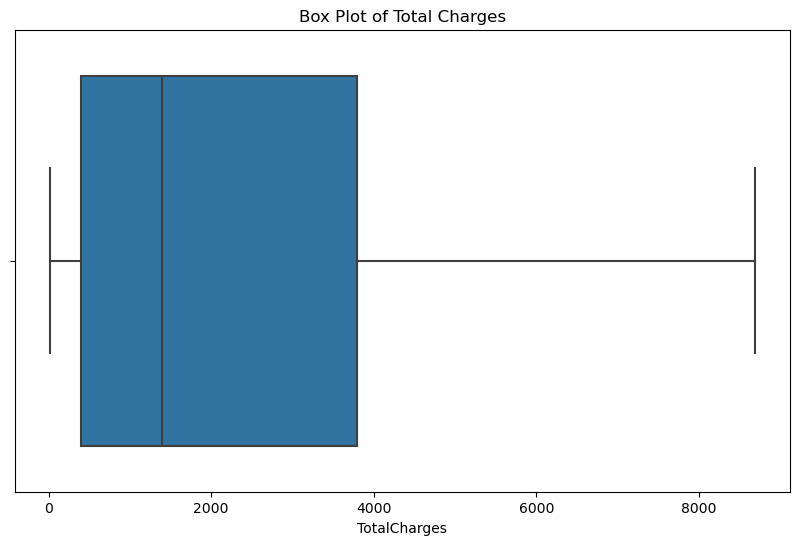

C:\Users\Sekhar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


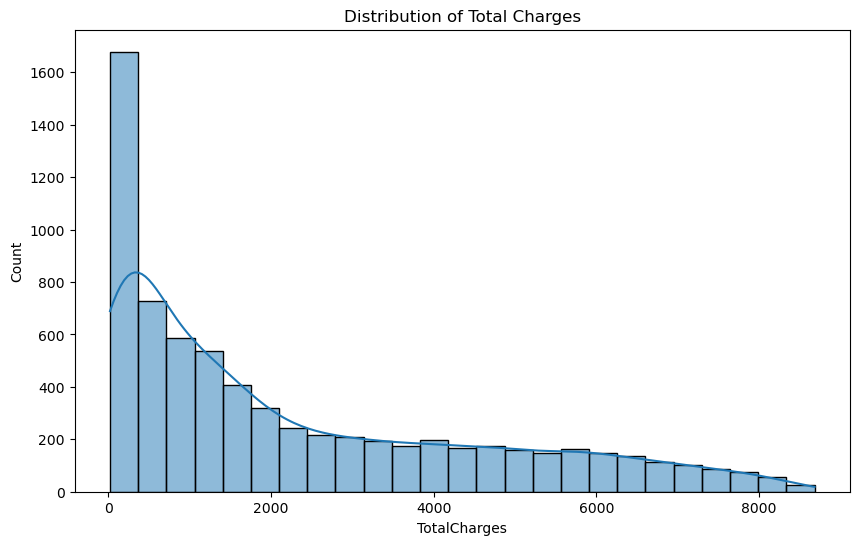

In [181]:
# Calculate statistics
Q1 = df_churn['TotalCharges'].quantile(0.25)
Q3 = df_churn['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df_churn[(df_churn['TotalCharges'] < lower_bound) | (df_churn['TotalCharges'] > upper_bound)]

print("Summary Statistics for TotalCharges:")
print(df_churn['TotalCharges'].describe())
print("\
Number of outliers:", len(outliers))
print("\
Outlier Boundaries:")
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_churn['TotalCharges'])
plt.title('Box Plot of Total Charges')
plt.show()

# Create histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(data=df_churn, x='TotalCharges', kde=True)
plt.title('Distribution of Total Charges')
plt.show()

In [182]:
df_churn['MonthlyCharges'].describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

C:\Users\Sekhar\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


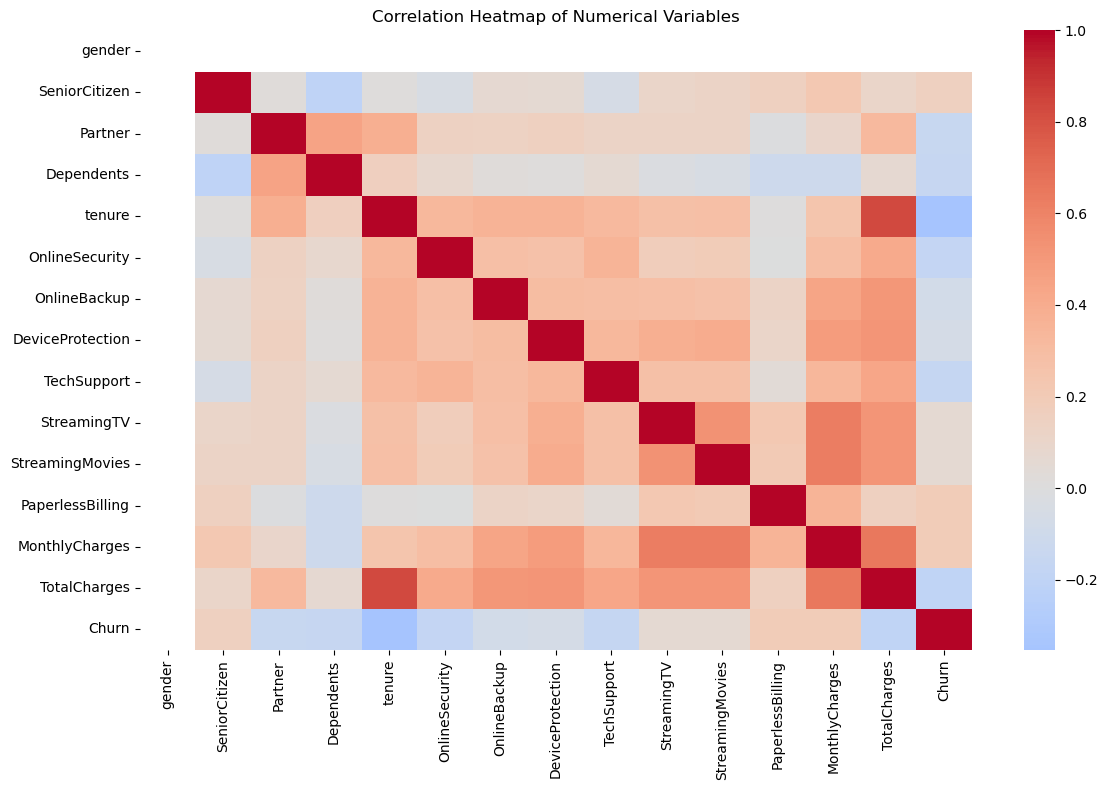

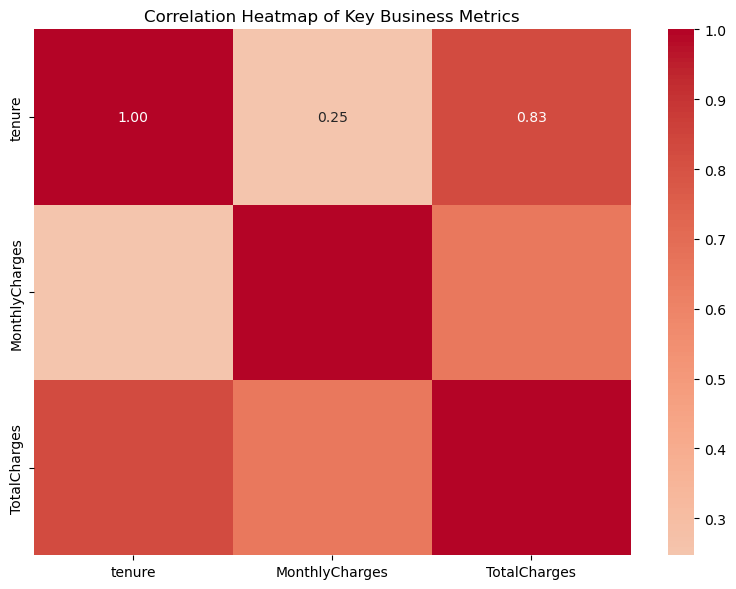

In [183]:
numerical_columns = df_churn.select_dtypes(include=['float64', 'int64']).columns

# Create correlation matrix
correlation_matrix = df_churn[numerical_columns].corr()

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

# Create a more focused heatmap with key business metrics
key_metrics = ['tenure', 'MonthlyCharges', 'TotalCharges']
focused_correlation = df_churn[key_metrics].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(focused_correlation, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap of Key Business Metrics')
plt.tight_layout()
plt.show()

In [184]:
df_churn['Churn'].dtype

dtype('int64')

In [185]:
df_churn['Churn'].unique()

array([0, 1], dtype=int64)

In [186]:
df_churn['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [187]:
# Recalculate correlation of all numerical features with Churn
correlation_with_churn = df_churn.corr()['Churn'].sort_values(ascending=False)

print("Correlation of features with Churn:")
print(correlation_with_churn)

Correlation of features with Churn:
Churn               1.000000
Fiber optic         0.307463
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
StreamingTV         0.063254
StreamingMovies     0.060860
Yes                 0.040033
No phone service   -0.011691
DeviceProtection   -0.066193
OnlineBackup       -0.082307
Partner            -0.149982
Dependents         -0.163128
TechSupport        -0.164716
OnlineSecurity     -0.171270
TotalCharges       -0.199484
No                 -0.227578
tenure             -0.354049
Contract           -0.396150
gender                   NaN
Name: Churn, dtype: float64


In [188]:
df_churn['Tenure_MonthlyCharges'] = df_churn['tenure'] * df_churn['MonthlyCharges']
df_churn['AvgChargesPerMonth'] = df_churn['TotalCharges'] / df_churn['tenure']

In [189]:
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,No phone service,Yes,Fiber optic,No,Tenure_MonthlyCharges,AvgChargesPerMonth
0,0,0,1,0,1,0,1,0,0,0,...,2,29.85,29.85,0,1,0,0,0,29.85,29.850000
1,0,0,0,0,34,1,0,1,0,0,...,3,56.95,1889.50,0,0,0,0,0,1936.30,55.573529
2,0,0,0,0,2,1,1,0,0,0,...,3,53.85,108.15,1,0,0,0,0,107.70,54.075000
3,0,0,0,0,45,1,0,1,1,0,...,0,42.30,1840.75,0,1,0,0,0,1903.50,40.905556
4,0,0,0,0,2,0,0,0,0,0,...,2,70.70,151.65,1,0,0,1,0,141.40,75.825000


In [190]:
df_churn.drop(['gender'], axis=1, inplace=True)

In [191]:
# Map integer values in PaymentMethod back to their corresponding string labels
payment_method_mapping = {
    0: 'Electronic check',
    1: 'Mailed check',
    2: 'Bank transfer (automatic)',
    3: 'Credit card (automatic)'
}

df_churn['PaymentMethod'] = df_churn['PaymentMethod'].map(payment_method_mapping)

# Reattempt creating the Payment_Risk feature
median_monthly_charges = df_churn['MonthlyCharges'].median()
df_churn['Payment_Risk'] = ((df_churn['MonthlyCharges'] > median_monthly_charges) & (df_churn['PaymentMethod'].str.contains('Electronic', case=False))).astype(int)

# # Display the updated dataframe with new features
# print("Updated DataFrame with new features:")
# print(df_churn[['Contract_Duration', 'Service_Count', 'Customer_Lifetime_Value', 'Payment_Risk']].head())

In [192]:
# Feature Engineering
# 1. Contract Duration Categories
df_churn['Contract'] = df_churn['Contract'].map({
    0 : 'Month-to-month',
    1 : 'One year',
    2 : 'Two year'
})
df_churn['Contract_Duration'] = df_churn['Contract'].map({
    'Month-to-month': 1,
    'One year': 12,
    'Two year': 24
})

# 2. Service Count (Total number of services subscribed)
service_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df_churn['Service_Count'] = df_churn[service_columns].apply(lambda row: sum(row == 'Yes'), axis=1)

# 3. Customer Lifetime Value (CLV)
df_churn['Customer_Lifetime_Value'] = df_churn['tenure'] * df_churn['MonthlyCharges']

# Display the head of the updated dataframe
print("Updated DataFrame with new features:")
print(df_churn[['Contract_Duration', 'Service_Count', 'Customer_Lifetime_Value', 'Payment_Risk']].head())

Updated DataFrame with new features:
   Contract_Duration  Service_Count  Customer_Lifetime_Value  Payment_Risk
0                  1              0                    29.85             0
1                 12              0                  1936.30             0
2                  1              0                   107.70             0
3                 12              0                  1903.50             0
4                  1              0                   141.40             0


In [193]:
df_churn.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,No phone service,Yes,Fiber optic,No,Tenure_MonthlyCharges,AvgChargesPerMonth,Payment_Risk,Contract_Duration,Service_Count,Customer_Lifetime_Value
0,0,1,0,1,0,1,0,0,0,0,...,1,0,0,0,29.85,29.850000,0,1,0,29.85
1,0,0,0,34,1,0,1,0,0,0,...,0,0,0,0,1936.30,55.573529,0,12,0,1936.30
2,0,0,0,2,1,1,0,0,0,0,...,0,0,0,0,107.70,54.075000,0,1,0,107.70
3,0,0,0,45,1,0,1,1,0,0,...,1,0,0,0,1903.50,40.905556,0,12,0,1903.50
4,0,0,0,2,0,0,0,0,0,0,...,0,0,1,0,141.40,75.825000,0,1,0,141.40


In [194]:
df2 = df_churn.drop(['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'], axis=1)
df2.head()

,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,No phone service,Yes,Fiber optic,No,Tenure_MonthlyCharges,AvgChargesPerMonth,Payment_Risk,Contract_Duration,Service_Count,Customer_Lifetime_Value
0,0,1,0,1,Month-to-month,1,Bank transfer (automatic),29.85,29.85,0,1,0,0,0,29.85,29.850000,0,1,0,29.85
1,0,0,0,34,One year,0,Credit card (automatic),56.95,1889.50,0,0,0,0,0,1936.30,55.573529,0,12,0,1936.30
2,0,0,0,2,Month-to-month,1,Credit card (automatic),53.85,108.15,1,0,0,0,0,107.70,54.075000,0,1,0,107.70
3,0,0,0,45,One year,0,Electronic check,42.30,1840.75,0,1,0,0,0,1903.50,40.905556,0,12,0,1903.50
4,0,0,0,2,Month-to-month,1,Bank transfer (automatic),70.70,151.65,1,0,0,1,0,141.40,75.825000,0,1,0,141.40


In [195]:
df2.drop(['Contract'], axis=1, inplace=True)

In [196]:
df2.drop(['PaymentMethod'], axis=1, inplace=True)

In [197]:
# Exclude non-numeric columns for correlation calculations
numeric_columns = df2.select_dtypes(include=['number']).columns

# Recalculate correlations with Churn
correlations = df2[numeric_columns].corr()['Churn'].abs().sort_values(ascending=True)

# Check for highly correlated features among themselves
correlation_matrix = df2[numeric_columns].corr()
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8 and i != j:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

print("Features with lowest correlation with Churn:")
print(correlations.head(10))

print("\
Highly correlated feature pairs (>0.8):")
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

# Check for columns with many missing values
missing_values = df.isnull().sum() / len(df) * 100
print("\
Columns with missing values (%):")
print(missing_values[missing_values > 0])

Features with lowest correlation with Churn:
No phone service      0.011691
Payment_Risk          0.034073
Yes                   0.040033
Partner               0.149982
SeniorCitizen         0.150541
Dependents            0.163128
PaperlessBilling      0.191454
AvgChargesPerMonth    0.192033
MonthlyCharges        0.192858
TotalCharges          0.199484
Name: Churn, dtype: float64
Highly correlated feature pairs (>0.8):
TotalCharges - tenure: 0.826
Tenure_MonthlyCharges - tenure: 0.826
Tenure_MonthlyCharges - TotalCharges: 1.000
AvgChargesPerMonth - MonthlyCharges: 0.996
Customer_Lifetime_Value - tenure: 0.826
Customer_Lifetime_Value - TotalCharges: 1.000
Customer_Lifetime_Value - Tenure_MonthlyCharges: 1.000
Columns with missing values (%):
Series([], dtype: float64)


In [198]:
# Recalculate correlation of all numerical features with Churn
correlation_with_churn = df2.corr()['Churn'].sort_values(ascending=False)

print("Correlation of features with Churn:")
print(correlation_with_churn)

Correlation of features with Churn:
Churn                      1.000000
Fiber optic                0.307463
MonthlyCharges             0.192858
AvgChargesPerMonth         0.192033
PaperlessBilling           0.191454
SeniorCitizen              0.150541
Yes                        0.040033
No phone service          -0.011691
Payment_Risk              -0.034073
Partner                   -0.149982
Dependents                -0.163128
TotalCharges              -0.199484
Tenure_MonthlyCharges     -0.199675
Customer_Lifetime_Value   -0.199675
No                        -0.227578
tenure                    -0.354049
Contract_Duration         -0.393888
Service_Count                   NaN
Name: Churn, dtype: float64


In [199]:
df3 = df2.drop(['No phone service', 'Payment_Risk', 'Yes'], axis=1)

In [200]:
df3.head()

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Fiber optic,No,Tenure_MonthlyCharges,AvgChargesPerMonth,Contract_Duration,Service_Count,Customer_Lifetime_Value
0,0,1,0,1,1,29.85,29.85,0,0,0,29.85,29.850000,1,0,29.85
1,0,0,0,34,0,56.95,1889.50,0,0,0,1936.30,55.573529,12,0,1936.30
2,0,0,0,2,1,53.85,108.15,1,0,0,107.70,54.075000,1,0,107.70
3,0,0,0,45,0,42.30,1840.75,0,0,0,1903.50,40.905556,12,0,1903.50
4,0,0,0,2,1,70.70,151.65,1,1,0,141.40,75.825000,1,0,141.40


In [201]:
df3.drop(['Customer_Lifetime_Value'], axis=1, inplace=True)

In [202]:
df3.shape

(7032, 14)

In [203]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SeniorCitizen          7032 non-null   int64  
 1   Partner                7032 non-null   int64  
 2   Dependents             7032 non-null   int64  
 3   tenure                 7032 non-null   int64  
 4   PaperlessBilling       7032 non-null   int64  
 5   MonthlyCharges         7032 non-null   float64
 6   TotalCharges           7032 non-null   float64
 7   Churn                  7032 non-null   int64  
 8   Fiber optic            7032 non-null   int32  
 9   No                     7032 non-null   int32  
 10  Tenure_MonthlyCharges  7032 non-null   float64
 11  AvgChargesPerMonth     7032 non-null   float64
 12  Contract_Duration      7032 non-null   int64  
 13  Service_Count          7032 non-null   int64  
dtypes: float64(4), int32(2), int64(8)
memory usage: 769.1 KB


In [204]:
# Recalculate correlation of all numerical features with Churn
correlation_with_churn = df3.corr()['Churn'].sort_values(ascending=False)

print("Correlation of features with Churn:")
print(correlation_with_churn)

Correlation of features with Churn:
Churn                    1.000000
Fiber optic              0.307463
MonthlyCharges           0.192858
AvgChargesPerMonth       0.192033
PaperlessBilling         0.191454
SeniorCitizen            0.150541
Partner                 -0.149982
Dependents              -0.163128
TotalCharges            -0.199484
Tenure_MonthlyCharges   -0.199675
No                      -0.227578
tenure                  -0.354049
Contract_Duration       -0.393888
Service_Count                 NaN
Name: Churn, dtype: float64


In [205]:
# Check the variance of Service_Count to confirm if it has no variability
service_count_variance = df3['Service_Count'].var()

# Print the variance result
print("Variance of Service_Count:", service_count_variance)


Variance of Service_Count: 0.0


In [206]:
df3['Service_Count'].value_counts()

Service_Count
0    7032
Name: count, dtype: int64

In [207]:
df4 = df3.drop(['Service_Count'], axis=1)
df4.head()

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Fiber optic,No,Tenure_MonthlyCharges,AvgChargesPerMonth,Contract_Duration
0,0,1,0,1,1,29.85,29.85,0,0,0,29.85,29.850000,1
1,0,0,0,34,0,56.95,1889.50,0,0,0,1936.30,55.573529,12
2,0,0,0,2,1,53.85,108.15,1,0,0,107.70,54.075000,1
3,0,0,0,45,0,42.30,1840.75,0,0,0,1903.50,40.905556,12
4,0,0,0,2,1,70.70,151.65,1,1,0,141.40,75.825000,1


In [208]:
x = df4.drop(['Churn'], axis=1)
y = df4.Churn
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [209]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=500, random_state=0)
lr.fit(X_train, Y_train)
lr.score(x_test, y_test)

0.8024164889836531

In [210]:
len(x)

7032

In [211]:
len(y)

7032

<function matplotlib.pyplot.show(close=None, block=None)>

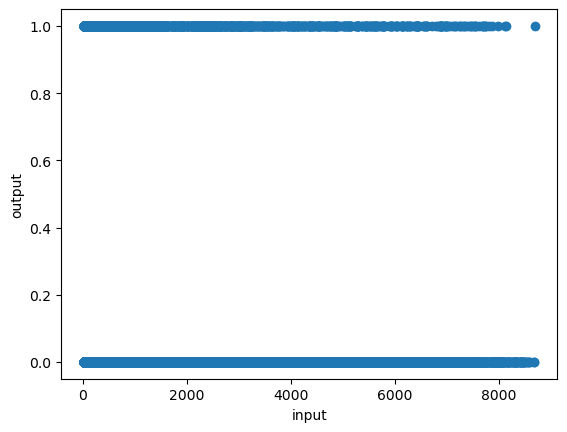

In [212]:
plt.scatter(df4['TotalCharges'], y)
plt.xlabel('input')
plt.ylabel('output')
plt.show

In [213]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [214]:
# models = {
#     'RandomForest': (RandomForestClassifier(), {
#         'n_estimators': [100, 200],
#         'max_depth': [10, 20],
#         'min_samples_split': [2, 5]
#     }),
#     'SVM': (SVC(), {
#         'C': [0.1, 1, 10],
#         'kernel': ['rbf', 'linear']
#     }),
#     'LogisticRegression': (LogisticRegression(), {
#         'C': [0.1, 1, 10],
#         'max_iter': [1000]
#     }),
#     'KNN': (KNeighborsClassifier(), {
#         'n_neighbors': [3, 5, 7],
#         'weights': ['uniform', 'distance']
#     }),
#     'DecisionTree': (DecisionTreeClassifier(), {
#         'max_depth': [5, 10, 15],
#         'min_samples_split': [2, 5]
#     })
# }

# # Perform GridSearchCV for each model
# results = {}
# for name, (model, param_grid) in models.items():
#     grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
#     grid_search.fit(X_train, Y_train)
#     test_score = grid_search.score(x_test, y_test)
#     results[name] = {
#         'best_params': grid_search.best_params_,
#         'test_score': test_score
#     }
#     print(f"\
# {name}:")
#     print(f"Best Parameters: {grid_search.best_params_}")
#     print(f"Test Score: {test_score:.4f}")

# # Find the best model
# best_model = max(results.items(), key=lambda x: x[1]['test_score'])
# print(f"\
# Best Model: {best_model[0]} with test score: {best_model[1]['test_score']:.4f}")
# print(f"Best Parameters: {best_model[1]['best_params']}")

In [215]:
df4.to_csv('churn_df.csv', index=False)

In [216]:
df5 = df4.drop(['TotalCharges', 'Tenure_MonthlyCharges', 'AvgChargesPerMonth'], axis=1)
df5.head()

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,Churn,Fiber optic,No,Contract_Duration
0,0,1,0,1,1,29.85,0,0,0,1
1,0,0,0,34,0,56.95,0,0,0,12
2,0,0,0,2,1,53.85,1,0,0,1
3,0,0,0,45,0,42.30,0,0,0,12
4,0,0,0,2,1,70.70,1,1,0,1


In [217]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df5[['tenure', 'MonthlyCharges']] = scaler.fit_transform(df5[['tenure', 'MonthlyCharges']])


In [218]:
df5['tenure'].head()

0    0.000000
1    0.464789
2    0.014085
3    0.619718
4    0.014085
Name: tenure, dtype: float64

In [219]:
X = df5.drop(['Churn'],axis=1)
Y = df5['Churn']

In [220]:
X.shape

(7032, 9)

In [221]:
Y.shape

(7032,)

In [222]:
x_train, X_test, y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [223]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Ensure consistent data format (keep Pandas DataFrame)
# Use the same format as used during fitting
X_test = x_test  # Ensure X_test is a Pandas DataFrame if x_train is also a DataFrame

# Initialize the base models
logistic_model = LogisticRegression(C=1, penalty='l2', solver='liblinear', random_state=42)
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a Voting Classifier with Logistic Regression and Random Forest
voting_classifier = VotingClassifier(
    estimators=[
        ('lr', logistic_model),
        ('rf', random_forest_model)
    ],
    voting='soft'  # Use 'soft' voting for probability-based decisions
)

# Train the Voting Classifier
voting_classifier.fit(x_train, y_train)  # Ensure `x_train` is a DataFrame

# Evaluate on the test set
y_pred_voting = voting_classifier.predict(x_test)  # Ensure `x_test` is a DataFrame
voting_accuracy = accuracy_score(y_test, y_pred_voting)

# Print the accuracy
print(f"Voting Classifier (Logistic + Random Forest) Accuracy: {voting_accuracy * 100:.2f}%")


Voting Classifier (Logistic + Random Forest) Accuracy: 91.76%


In [224]:
import joblib

# Save the model to a file
joblib.dump(voting_classifier, 'churn_model.joblib')
print("Model saved successfully as 'churn_model.joblib'")


Model saved successfully as 'churn_model.joblib'


In [297]:
x_train.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Fiber optic', 'No',
       'Tenure_MonthlyCharges', 'AvgChargesPerMonth', 'Contract_Duration'],
      dtype='object')